In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("age_gender.csv")
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

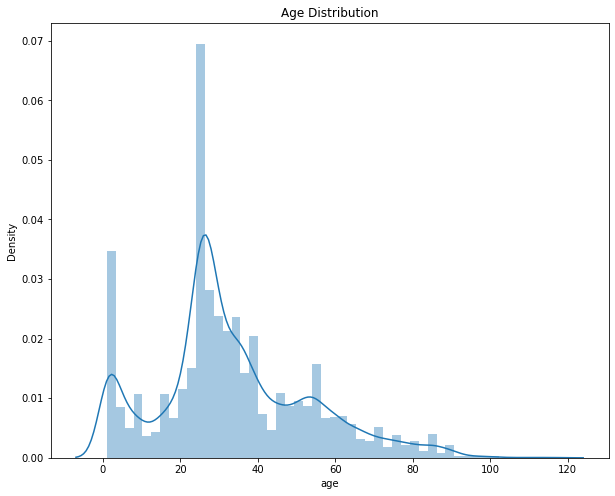

In [4]:
plt.figure(figsize=(10,8))
sns.distplot(df.age)
plt.title("Age Distribution")

<AxesSubplot:>

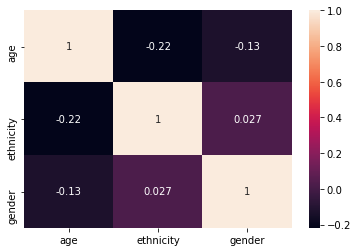

In [5]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [6]:
# extracting pixels & convert them to an npArray
def toArray(pixels):
    array = np.array(pixels.split(),"float64")
    array = array.reshape(48,48)
    
    return array
df['pixels']= df['pixels'].apply(toArray)

In [7]:
image=df.pixels
age=df.age

In [8]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_age,test_age= train_test_split(image, age, test_size=0.2, random_state=42)

In [9]:
# Change dimension of Data
def change_image_dimension(data):
    data=np.reshape(data.to_list(), (len(data), 48,48,1))
    return data

In [10]:
train_img= change_image_dimension(train_img)
test_img= change_image_dimension(test_img)
train_img=train_img/255.0
test_img=test_img/255.0

In [11]:
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, MaxPool2D, Dense, Conv2D, Flatten
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

In [12]:
reduceLR=ReduceLROnPlateau(monitor='val_mean_absolute_error',patience=1,min_lr=0.00001)

In [13]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.compile(optimizer='adam', loss='mse',metrics=[keras.metrics.mean_absolute_error])
age_detect=model.fit(train_img, train_age, validation_data=(test_img, test_age),epochs=2, callbacks=[reduceLR])

Epoch 1/2
593/593 [==============================] - 152s 256ms/step - loss: 86.4265 - mean_absolute_error: 6.8398 - val_loss: 253.4966 - val_mean_absolute_error: 12.5603 - lr: 0.0010
Epoch 2/2
593/593 [==============================] - ETA: 0s - loss: 73.9471 - mean_absolute_error: 6.3344

In [15]:
import pickle
pickle.dump(age_detect,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://42cb65ce-15f6-471e-a8f7-afba05d9514b/assets
